Name of Student:

PRN:

**Python applied to Mechanical Applications.**



Test is carried out on a 4S single cylinder Petrol engine using rope brake dynamometer.

Cylinder Bore = 0.07 m, Stroke = 0.0667 m, Dead weight on Hanger, W_0 = 1 kg

Brake drum diameter= 0.20 m, Rope thickness = 0.015 m Effective drum radius = 0.1075 m

Fuel: Density ρ= 710 kg/m3, Calorific value CV = 42000 kJ/kg


Observation Table:

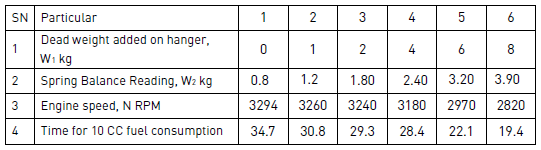

Calculation Table:

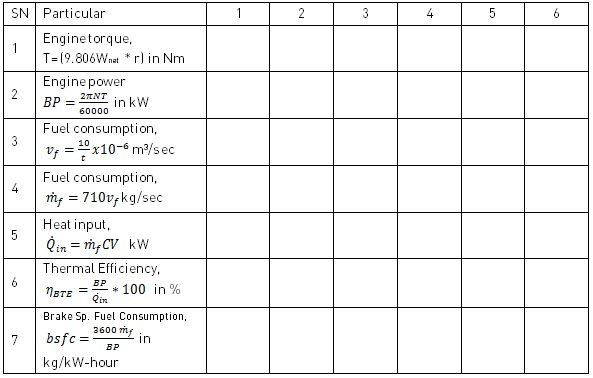

Enter values of weights added on hanger: 0 1 2 4 6 8
weight added on hanger:  [0.0, 1.0, 2.0, 4.0, 6.0, 8.0]
Enter values of Spring Balnce readings: 0.8 1.2 1.8 2.4 3.2 3.9
Spring Balnce readings:  [0.8, 1.2, 1.8, 2.4, 3.2, 3.9]
Enter values of Engine RPM: 3294 3260 3240 3180 2970 2820
Engine RPM values:  [3294.0, 3260.0, 3240.0, 3180.0, 2970.0, 2820.0]
Enter values of time for 10 CC Fuel consumption: 34.7 30.8 29.3 28.4 22.1 19.4
Values of time for 10 CC Fuel consumption:  [34.7, 30.8, 29.3, 28.4, 22.1, 19.4]
output data of BP, mf, Brake thermal efficiency and BSFC are:
[array([0.07, 0.29, 0.43, 0.91, 1.25, 1.59]), array([0.00020461, 0.00023052, 0.00024232, 0.00025   , 0.00032127,
       0.00036598]), array([ 0.84626114,  2.97358006,  4.21711271,  8.69240874,  9.23322995,
       10.32862111]), array([10.12858584,  2.88252827,  2.03253485,  0.98608209,  0.92832396,
        0.82987153])]


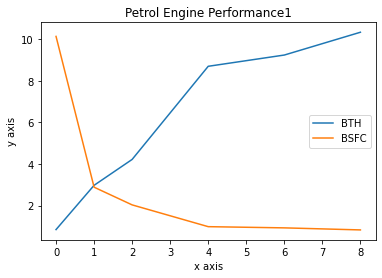

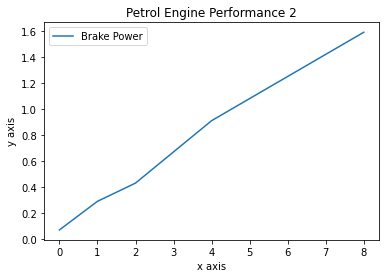

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# define Test constants. All dimensions are in SI units.

K = 1          # For a 4S single cylinder engine
D = 0.070   # bore
L = 0.0667  # stroke
r = 0.1075     # Effective Brake drum diameter considering rope thickness.
density = 710             # Fuel: Density ρ= 710 kg/m3
CV = 42000               # Fuel: Calorific value CV = 42000 kJ/kg
W0= 1                       # dead weight on hanger (constant throughout the test)
W1= 0                       #  added weight on hanger.
W2 = 0                      # Spring Balance Reading, kg
RPM = 0
t = 0                         # Time for 10 CC fuel consumption.

#Define functions to calculate BP, fuel flow rate, BSFC and Brake Thermal efficiency.
def brake_power(x):
    return float(np.round(((2 * math.pi * x[2] * 9.806 * r *(1+x[0]-x[1])) / 60000),2))

def mf(x):
    return (density * (math.pow(10,-5)) / x[3])

def brake_eff(x):
    return 100*(((2 * math.pi * x[2] * 9.806 * r *(1+x[0]-x[1])) / 60000)) / (CV*(density * (math.pow(10,-5)) / x[3]))

def brake_sfc(x):
    return (3600*(density * (math.pow(10,-5)) / x[3])/((2 * math.pi * x[2] * 9.806 * r *(1+x[0]-x[1])) / 60000))

# Accept user input as lists.
W1_list = list(map(float, input("Enter values of weights added on hanger: ").split()))
print("weight added on hanger: ", W1_list)
W2_list = list(map(float, input("Enter values of Spring Balnce readings: ").split()))
print("Spring Balnce readings: ", W2_list)
RPM_list = list(map(float, input("Enter values of Engine RPM: ").split()))
print("Engine RPM values: ", RPM_list)
t_list = list(map(float, input("Enter values of time for 10 CC Fuel consumption: ").split()))
print("Values of time for 10 CC Fuel consumption: ", t_list)

# Store input data as transposed array.
data = np.array((W1_list,W2_list,RPM_list,t_list)).T
#print(data)

output = []
#type(output)
output.append(np.apply_along_axis(brake_power, axis=1, arr=data))
output.append(np.apply_along_axis(mf, axis=1, arr=data))
output.append(np.apply_along_axis(brake_eff, axis=1, arr=data))
output.append(np.apply_along_axis(brake_sfc, axis=1, arr=data))
print("output data of BP, mf, Brake thermal efficiency and BSFC are:")
print(output)

x  = W1_list
y2 = output[2]
y3 = output[3]
plt.plot(x, y2, label="BTH")
plt.plot(x, y3, label="BSFC")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Petrol Engine Performance1")
plt.legend()
plt.show()

x  = W1_list
y1 = output[0]
plt.plot(x, y1, label="Brake Power")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Petrol Engine Performance 2")
plt.legend()
plt.show()